# Purification of amplitude-damped entangled state:

We use Amplitude damping Noise model in Aer Simulator.


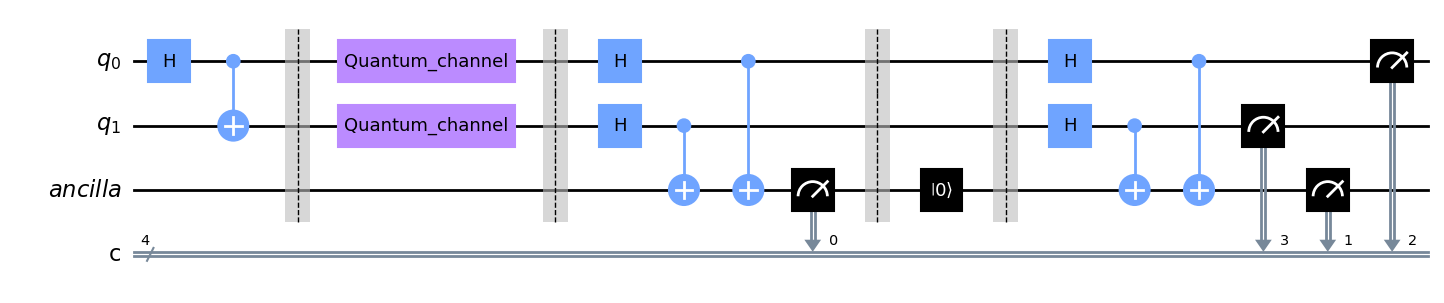

In [19]:
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister, execute, Aer,transpile, assemble
from qiskit.quantum_info import Kraus, SuperOp, Operator, partial_trace, DensityMatrix
from qiskit.visualization import plot_bloch_multivector, plot_state_city,  plot_histogram, circuit_drawer
from qiskit.providers.aer.noise import amplitude_damping_error, pauli_error, depolarizing_error, NoiseModel, phase_damping_error
from qiskit.quantum_info import DensityMatrix, partial_trace, Pauli
from qiskit_aer import AerSimulator
from qiskit.providers.aer import QasmSimulator
import matplotlib.pyplot as plt
import numpy as np
import math
from IPython.display import Markdown

q = QuantumRegister(2, 'q')
c = ClassicalRegister(4, 'c')
anc = QuantumRegister(1, 'ancilla') 
qc = QuantumCircuit(q,c,anc)

##### Preparation of Initial maximally entangled state:
qc.h(0)
qc.cx(0, 1)
qc.barrier()

# Sending qubits through amplitude damping channel to Charlie
r=0.8 #Damping probability of Amplitude damping
error =amplitude_damping_error(r, excited_state_population=0, canonical_kraus=True)
qc.append(error, [0])
qc.append(error, [1])
qc.barrier()

##### First PC(Z)
qc.h(0)
qc.h(1)
qc.cx(1, 2)
qc.cx(0, 2)
qc.measure([2],c[0])
qc.barrier()

#### Resetting the ancilla qubit
qc.reset(2)
#qc.barrier()
qc.barrier()

#### Second PC(Z)
qc.h(0)
qc.h(1)
qc.cx(1, 2)
qc.cx(0, 2)


qc.measure([2],c[1])
qc.measure([0,1],[2,3])
qc.draw('mpl')

In [20]:
Shots_n=100000
method = "statevector"
backend = AerSimulator(method="statevector")
job = backend.run(qc, method=method, shots=Shots_n)  # Run the simulation
result = job.result()  # Get the simulation result

counts = result.get_counts()  # Get the measurement counts
print(counts)

{'1100': 25956, '0000': 25965, '1101': 15846, '1011': 3915, '0001': 16257, '1010': 4024, '0111': 4097, '0110': 3940}


<center>Obtaining maximally entangled state: $\phi_+$</center>

Qiskit Probability= 0.51921
Mathematical Probability= 0.52


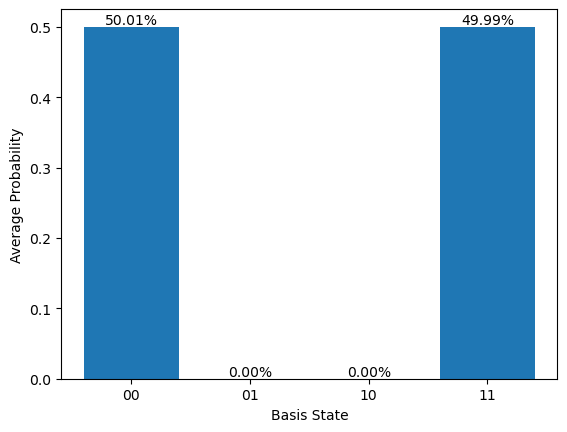

In [21]:
success, fail = 0, 0
Bell_states = {}
Bell_new= {}
for jj in counts:
        if (jj[-1]=='0' and jj[-2]=='0' ): #obtaining phi+
            success += counts[jj]
            Bell_state = jj
            if Bell_state in Bell_states:
                Bell_states[Bell_state] += counts[jj]
            else:
                Bell_states[Bell_state] = counts[jj]
        else:
            fail += counts[jj]
            
total = success + fail

# Extract the last character from each Bell state and store it in Bell_new as a dictionary
for i in Bell_states:
    last_char = i[:2]
    if last_char in Bell_new:
        Bell_new[last_char] += Bell_states[i]
    else:
        Bell_new[last_char] = Bell_states[i]
        
        
# Define the text to be centered
text = "Obtaining maximally entangled state: $\phi_+$"
# Display the centered text using Markdown formatting
display(Markdown(f"<center>{text}</center>"))        

print('Qiskit Probability=',success/total)
print('Mathematical Probability=',((r / 2 - 1) * (r**2 - 2 * r + 2)) / (r - 2))


# Convert counts to a sorted list of probabilities
basis_states = ['00', '01', '10', '11']
probabilities = [Bell_new.get(state, 0) / success for state in basis_states] # Normalized state
# Plot the probabilities as a bar graph
plt.bar(basis_states, probabilities)
plt.xlabel('Basis State')
plt.ylabel('Average Probability')
for i, prob in enumerate(probabilities):
    plt.text(basis_states[i], prob, f'{prob * 100:.2f}%', ha='center', va='bottom')
plt.show()

<center>Obtaining maximally entangled state: $\psi_+$</center>

Qiskit Probability= 0.07964
Mathematical Probability= 0.07999999999999999


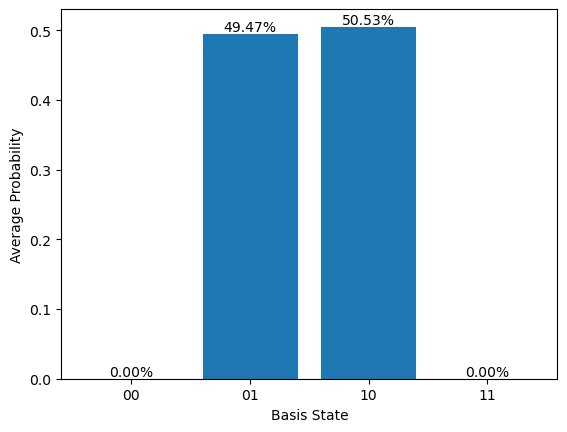

In [22]:
success, fail = 0, 0
Bell_states = {}
Bell_new= {}
for jj in counts:        
        if (jj[-1]=='0' and jj[-2]=='1'): #obtaining psi+
            success += counts[jj]
            Bell_state = jj
            if Bell_state in Bell_states:
                Bell_states[Bell_state] += counts[jj]
            else:
                Bell_states[Bell_state] = counts[jj]
        else:
            fail += counts[jj]
            
total = success + fail

# Extract the last character from each Bell state and store it in Bell_new as a dictionary
for i in Bell_states:
    last_char = i[:2]
    if last_char in Bell_new:
        Bell_new[last_char] += Bell_states[i]
    else:
        Bell_new[last_char] = Bell_states[i]
        
        
# Define the text to be centered
text = "Obtaining maximally entangled state: $\psi_+$"
# Display the centered text using Markdown formatting with bolding
display(Markdown(f"<center>{text}</center>"))    

print('Qiskit Probability=',success/total)
print('Mathematical Probability=',-((r * (r / 2 - 1) * (r - 1)) / (r - 2)))

# Convert counts to a sorted list of probabilities
basis_states = ['00', '01', '10', '11']
probabilities = [Bell_new.get(state, 0) / success for state in basis_states] # Normalized state
# Plot the probabilities as a bar graph
plt.bar(basis_states, probabilities)
plt.xlabel('Basis State')
plt.ylabel('Average Probability')
for i, prob in enumerate(probabilities):
    plt.text(basis_states[i], prob, f'{prob * 100:.2f}%', ha='center', va='bottom')
plt.show()

<center>Obtaining maximally entangled state: $\phi_-$</center>

Qiskit Probability= 0.32103
Mathematical Probability= 0.32000000000000006


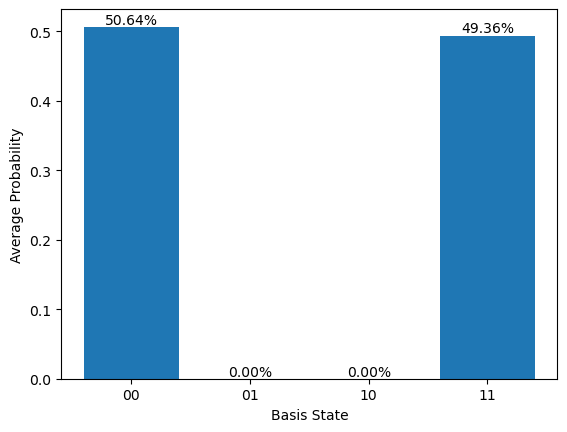

In [23]:
success, fail = 0, 0
Bell_states = {}
Bell_new= {}
for jj in counts:        
        if (jj[-1]=='1' and jj[-2]=='0'): #obtaining phi-
            success += counts[jj]
            Bell_state = jj
            if Bell_state in Bell_states:
                Bell_states[Bell_state] += counts[jj]
            else:
                Bell_states[Bell_state] = counts[jj]
        else:
            fail += counts[jj]
            
total = success + fail

# Extract the last character from each Bell state and store it in Bell_new as a dictionary
for i in Bell_states:
    last_char = i[:2]
    if last_char in Bell_new:
        Bell_new[last_char] += Bell_states[i]
    else:
        Bell_new[last_char] = Bell_states[i]
        
        
# Define the text to be centered
text = "Obtaining maximally entangled state: $\phi_-$"
# Display the centered text using Markdown formatting with bolding
display(Markdown(f"<center>{text}</center>"))    

print('Qiskit Probability=',success/total)
print('Mathematical Probability=',r**2/ 2)

# Convert counts to a sorted list of probabilities
basis_states = ['00', '01', '10', '11']
probabilities = [Bell_new.get(state, 0) / success for state in basis_states] # Normalized state
# Plot the probabilities as a bar graph
plt.bar(basis_states, probabilities)
plt.xlabel('Basis State')
plt.ylabel('Average Probability')
for i, prob in enumerate(probabilities):
    plt.text(basis_states[i], prob, f'{prob * 100:.2f}%', ha='center', va='bottom')
plt.show()

<center>Obtaining maximally entangled state: $\psi_-$</center>

Qiskit Probability= 0.08012
Mathematical Probability= 0.07999999999999999


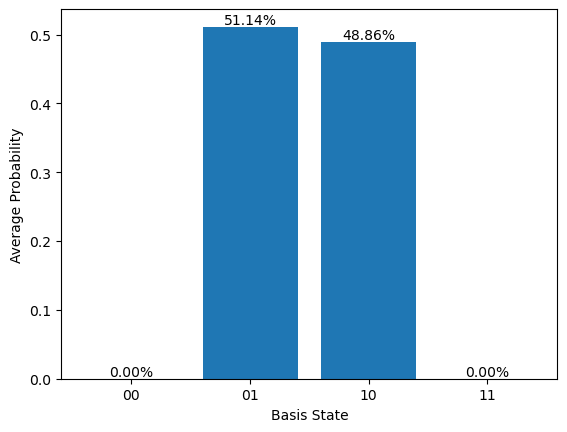

In [24]:
success, fail = 0, 0
Bell_states = {}
Bell_new= {}
for jj in counts:        
        if (jj[-1]=='1' and jj[-2]=='1'): #obtaining psi-
            success += counts[jj]
            Bell_state = jj
            if Bell_state in Bell_states:
                Bell_states[Bell_state] += counts[jj]
            else:
                Bell_states[Bell_state] = counts[jj]
        else:
            fail += counts[jj]
            
total = success + fail

# Extract the last character from each Bell state and store it in Bell_new as a dictionary
for i in Bell_states:
    last_char = i[:2]
    if last_char in Bell_new:
        Bell_new[last_char] += Bell_states[i]
    else:
        Bell_new[last_char] = Bell_states[i]
        
        
# Define the text to be centered
text = "Obtaining maximally entangled state: $\psi_-$"
# Display the centered text using Markdown formatting with bolding
display(Markdown(f"<center>{text}</center>"))    

print('Qiskit Probability=',success/total)
print('Mathematical Probability=',(r*(1-r))/ 2)

# Convert counts to a sorted list of probabilities
basis_states = ['00', '01', '10', '11']
probabilities = [Bell_new.get(state, 0) / success for state in basis_states] # Normalized state
# Plot the probabilities as a bar graph
plt.bar(basis_states, probabilities)
plt.xlabel('Basis State')
plt.ylabel('Average Probability')
for i, prob in enumerate(probabilities):
    plt.text(basis_states[i], prob, f'{prob * 100:.2f}%', ha='center', va='bottom')
plt.show()